# Обработка результатов

In [6]:
import numpy as np
import scipy as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Измерим угловые координаты спектральный линий ртути. Результаты занесем в таблицу.

In [190]:
data = pd.read_excel('lab-441.xlsx', 'table1')
data.head(len(data))

,цвет,phi1,phi2,sin(phi1),sin(phi2),lambda
0,фиолетовый,182.5686,177.5281,-0.0448,0.0431,404.7
1,синий,182.7186,177.2056,-0.0474,0.0488,435.8
2,голубой,182.9125,177.1750,-0.0508,0.0493,491.6
3,зеленый,183.1992,176.8908,-0.0558,0.0542,546.1
4,желтый,183.3775,176.7100,-0.0589,0.0574,577.0
5,желтый,183.3900,176.6994,-0.0591,0.0576,579.1
6,красный,183.6481,176.4369,-0.0636,0.0621,623.4


Построим график зависимости $sin(\phi_m)$ от длины волны $\lambda$.

In [191]:
x = data.values[:, 5]   # lambda
y1 = data.values[:, 3]  # sin(phi1)
y2 = data.values[:, 4]  # sin(phi2)

x = np.array(x, dtype=float)
y1 = np.array(y1, dtype=float)
y2 = np.array(y2, dtype=float)

k1, b1 = np.polyfit(x, y1, deg=1)
k2, b2 = np.polyfit(x, y2, deg=1)

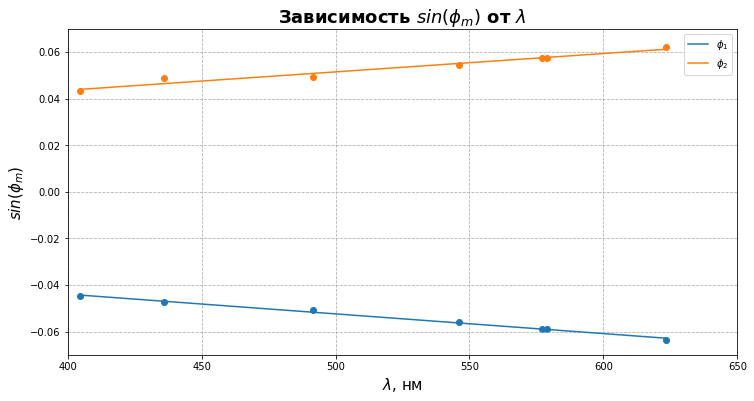

In [193]:
plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $sin(\phi_m)$ от $\lambda$', fontweight='bold', fontsize=18)
plt.ylabel('$sin(\phi_m)$', fontsize=15)
plt.xlabel('$\lambda$, нм', fontsize=15)

plt.scatter(x, y1)
plt.scatter(x, y2)

plt.plot(x, k1 * x + b1, label='$\phi_1$')
plt.plot(x, k2 * x + b2, label='$\phi_2$')

#plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o')

plt.xlim((400, 650))
plt.ylim((-0.07, 0.07))

plt.legend()
plt.show()

По углу наклона определим шаг решетки, используя формулу  $d \sin(\phi_m) = m \lambda$.

In [194]:
d1 = -1 / k1
d2 = 1 / k2

print('Значение для 1го порядка: ', d1, 'нм')
print('Значение для -1го порядка: ', d2, 'нм')

Значение для 1го порядка:  11819.5631651 нм
Значение для -1го порядка:  12700.1250507 нм


In [195]:
print('Усредненное значение: ', (d1 + d2) / 2, 'нм')

Усредненное значение:  12259.8441079 нм


Для оценки дисперсии решетки определим угловые координаты линий желтого дуплета во всех видимых порядках.

In [196]:
data2 = pd.read_excel('lab-441.xlsx', 'table2')
data2.head(len(data2))

,m,first,second,delta phi,D_exp,D_th
0,-2,173.359167,173.340000,0.019167,-32.857143,-32.626844
1,-3,180.988056,180.950556,0.037500,-64.285714,-48.940270
2,-4,166.583611,166.526944,0.056667,-97.142857,-65.253700
3,2,186.721944,186.744722,0.022778,39.047619,32.626844
4,3,190.091111,190.124722,0.033611,57.619048,48.940270
5,4,193.483333,193.537778,0.054444,93.333333,65.253700


In [197]:
x3 = data2.values[:, 0]
y3 = data2.values[:, 4]
y4 = data2.values[:, 5]

x3 = np.array(x3, dtype=float)
y3 = np.array(y3, dtype=float)
y4 = np.array(y4, dtype=float)

# k1, b1 = np.polyfit(x, y1, deg=1)
# k2, b2 = np.polyfit(x, y2, deg=1)

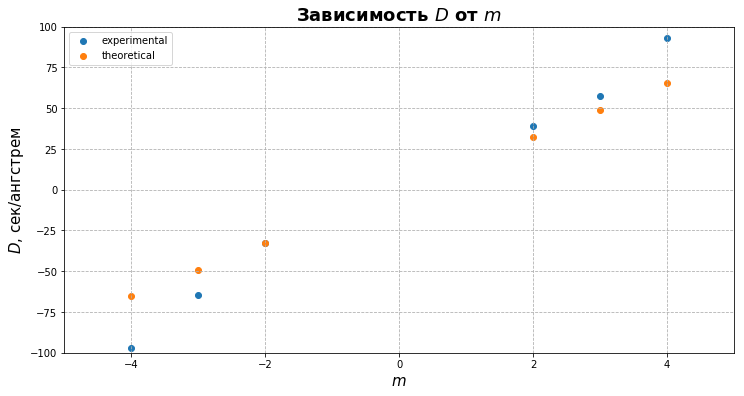

In [198]:
plt.figure(figsize=(12, 6))
plt.grid(linestyle='--')

plt.title('Зависимость $D$ от $m$', fontweight='bold', fontsize=18)
plt.ylabel('$D$, сек/ангстрем', fontsize=15)
plt.xlabel('$m$', fontsize=15)

plt.scatter(x3, y3, label='experimental')
plt.scatter(x3, y4, label='theoretical')

# plt.plot(x, k2 * x + b2, label='$\phi_2$')

#plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='o')

plt.xlim((-5, 5))
plt.ylim((-100, 100))

plt.legend()
plt.show()

Оценим экспериментальную разрешающую способность ($R = \dfrac{\lambda}{\delta\lambda} = \dfrac{\phi}{\delta\phi}$).  
Знаем, что $\delta\lambda = \dfrac{\delta\phi}{D}$, тогда $R = \dfrac{\lambda D}{\delta\phi} = 274.8$.  
Сравнив ее с теоретической по формуле $R = mN$, оценим число эффектично работающих штрихов $N \approx 275.$ Тогда размер освещенной части решетки $\approx 0.55$ мм.